In [35]:
# %% [markdown]
"""
# Customer Satisfaction Prediction - Part 2: Modeling
**Objective:** Build and evaluate predictive models
"""
# %%
# Imports
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
import pickle

In [19]:
# Always import first
import pandas as pd
df = pd.read_csv('customer_support_tickets.csv')
# Reload stored DataFrame

# Confirm it's loaded
print(type(df))
print(df.head())



<class 'pandas.core.frame.DataFrame'>
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       22-03-2021  Technical issue   
1          Female       LG Smart TV       22-05-2021  Technical issue   
2           Other          Dell XPS       14-07-2020  Technical issue   
3          Female  Microsoft Office       13-11-2020  Billing inquiry   
4          Female  Autodesk AutoCAD       04-02-2020  Billing inquiry   

             Ticket Subject  \
0             Pro

In [24]:
# %% [markdown]
"""
## 1. Feature Engineering
"""

# %% Imports
import pandas as pd

# Check if df is loaded and is a DataFrame
if df is None or not isinstance(df, pd.DataFrame):
    raise ValueError("DataFrame 'df' is not loaded or is None")

# Drop rows with missing target value
initial_shape = df.shape
df = df.dropna(subset=['Customer Satisfaction Rating'])
print(f"Dropped {initial_shape[0] - df.shape[0]} rows due to missing target.")

# Convert dates safely
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')

# Create new feature: Response Hours
df['Response Hours'] = (
    df['First Response Time'] - df['Date of Purchase']
).dt.total_seconds() / 3600

# Handle missing or invalid Response Hours (optional: fill with mean or drop)
missing_response_hours = df['Response Hours'].isna().sum()
if missing_response_hours > 0:
    print(f"Found {missing_response_hours} missing 'Response Hours'. Filling with mean.")
    df['Response Hours'].fillna(df['Response Hours'].mean(), inplace=True)

# Ensure 'Sentiment' column exists
if 'Sentiment' not in df.columns:
    raise KeyError("'Sentiment' column not found in the dataset. Please add or compute it.")

# Select features
features = df[[
    'Ticket Type', 'Ticket Priority', 'Response Hours',
    'Sentiment', 'Customer Age'
]]

# Convert target column to integer
target = df['Customer Satisfaction Rating'].astype(int)

# Confirm success
print("Feature engineering completed successfully!")
print(f"Final shape: Features = {features.shape}, Target = {target.shape}")


Dropped 0 rows due to missing target.
Feature engineering completed successfully!
Final shape: Features = (2769, 5), Target = (2769,)


In [28]:
# %% [markdown]
"""
## 2. Preprocessing Pipeline
"""
# %%
# Define transformers
categorical_features = ['Ticket Type', 'Ticket Priority']
numeric_features = ['Response Hours', 'Sentiment', 'Customer Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)]
)


In [29]:
# %% [markdown]
"""
## 3. Model Training
"""
# %%
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Train
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# Save model
joblib.dump(model, 'satisfaction_model.joblib')

              precision    recall  f1-score   support

           1       0.18      0.18      0.18       109
           2       0.17      0.15      0.15       117
           3       0.18      0.20      0.19       112
           4       0.21      0.19      0.20       108
           5       0.20      0.21      0.21       108

    accuracy                           0.19       554
   macro avg       0.19      0.19      0.19       554
weighted avg       0.19      0.19      0.19       554



['satisfaction_model.joblib']


Random Forest Results:
Accuracy: 0.20
              precision    recall  f1-score   support

         1.0       0.21      0.22      0.21       109
         2.0       0.19      0.19      0.19       117
         3.0       0.20      0.24      0.22       112
         4.0       0.20      0.19      0.19       108
         5.0       0.22      0.18      0.19       108

    accuracy                           0.20       554
   macro avg       0.20      0.20      0.20       554
weighted avg       0.20      0.20      0.20       554


Gradient Boosting Results:
Accuracy: 0.21
              precision    recall  f1-score   support

         1.0       0.24      0.16      0.19       109
         2.0       0.26      0.05      0.09       117
         3.0       0.22      0.59      0.32       112
         4.0       0.16      0.20      0.18       108
         5.0       0.18      0.04      0.06       108

    accuracy                           0.21       554
   macro avg       0.21      0.21      0.17      

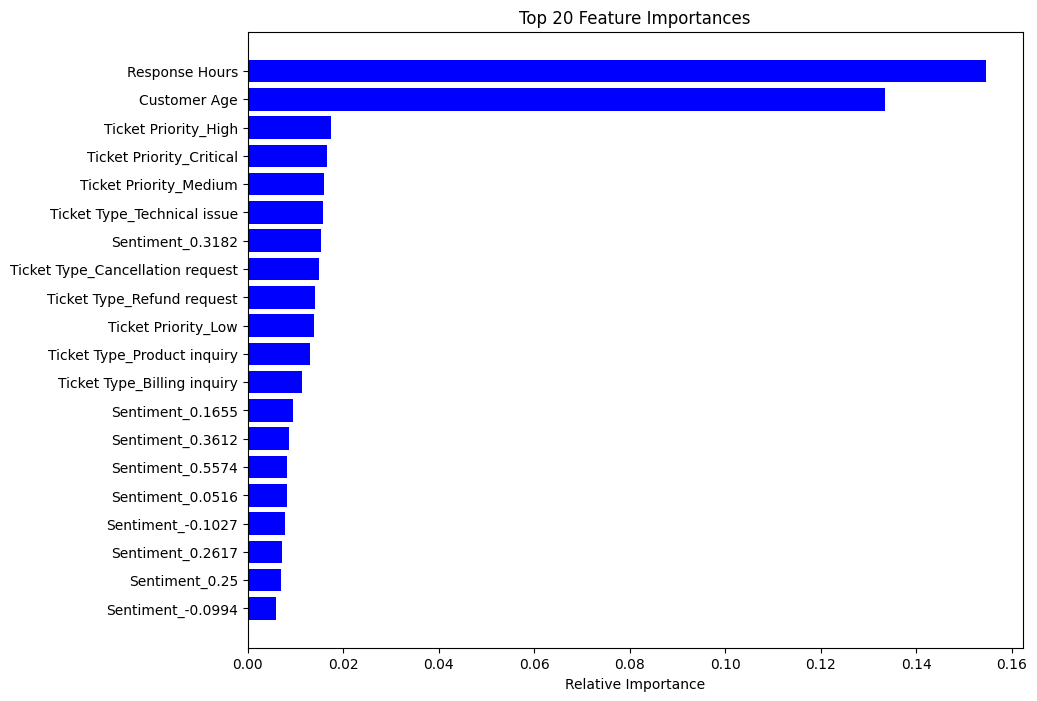

In [43]:
# ------------------------ #
# Required Libraries
# ------------------------ #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------ #
# Define Your Features
# ------------------------ #
categorical_features = ['Ticket Type', 'Ticket Priority', 'Sentiment']
numerical_features = ['Response Hours', 'Customer Age']

# ------------------------ #
# Preprocessing
# ------------------------ #
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ------------------------ #
# 📂 Data Split
# ------------------------ #
target = df['Customer Satisfaction Rating']
features = df[categorical_features + numerical_features]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# ------------------------ #
# Model Training & Evaluation
# ------------------------ #
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {results[name]['accuracy']:.2f}")
    print(results[name]['report'])

# ------------------------ #
# Feature Importance (Random Forest)
# ------------------------ #
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# Get feature names after encoding
onehot_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
onehot_columns = list(onehot_encoder.get_feature_names_out(categorical_features))
all_features = numerical_features + onehot_columns

importances = rf_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

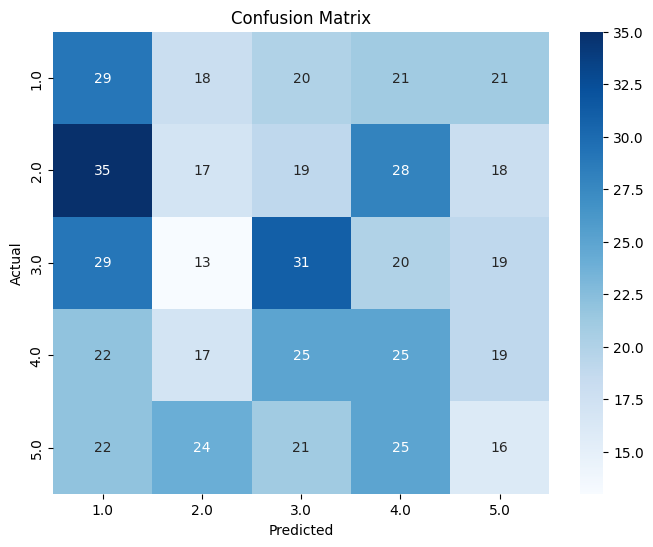


Common Characteristics of Misclassified Samples:
            Ticket Type Ticket Priority   Sentiment  Response Hours  \
count               436             436  436.000000      436.000000   
unique                5               4         NaN             NaN   
top     Billing inquiry        Critical         NaN             NaN   
freq                 94             120         NaN             NaN   
mean                NaN             NaN    0.310677    17992.640405   
std                 NaN             NaN    0.406786     5351.032541   
min                 NaN             NaN   -0.888500     8990.033333   
25%                 NaN             NaN    0.074450    13054.595833   
50%                 NaN             NaN    0.340000    18302.066667   
75%                 NaN             NaN    0.636900    22604.533333   
max                 NaN             NaN    0.958400    29327.766667   

        Customer Age      Actual   Predicted  
count     436.000000  436.000000  436.000000  
uni

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyze misclassifications
misclassified = X_test[y_pred != y_test].copy()
misclassified['Actual'] = y_test[y_pred != y_test].values
misclassified['Predicted'] = y_pred[y_pred != y_test]

print("\nCommon Characteristics of Misclassified Samples:")
print(misclassified.describe(include='all'))


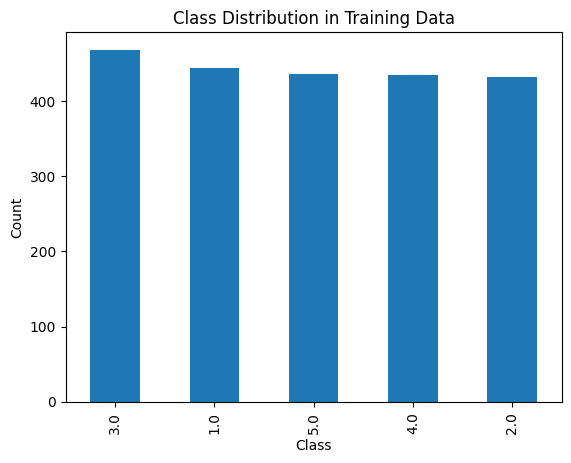

In [45]:
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar', title='Class Distribution in Training Data')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
